# Daily website visitors (time series regression)
Predict tomorrow's number of website visitors from 5 years of daily data

About Dataset
<br>
Context
This file contains 5 years of daily time series data for several measures of traffic on a statistical forecasting teaching notes website whose alias is statforecasting.com. The variables have complex seasonality that is keyed to 
<br>
the day of the week and to the academic calendar. The patterns you you see here are similar in principle to what you would see in other daily data with day-of-week and time-of-year effects. Some good exercises are to develop a 
<br>
1-day-ahead forecasting model, a 7-day ahead forecasting model, and an entire-next-week forecasting model (i.e., next 7 days) for unique visitors.

Unique.Visits: If you want to predict the number of unique visitors on the website tomorrow.
here it our target 

Content
<br>
The variables are daily counts of page loads, unique visitors, first-time visitors, and returning visitors to an academic teaching notes website. There are 2167 rows of data spanning the date range from September 14, 2014, to 
<b>
August 19, 2020. A visit is defined as a stream of hits on one or more pages on the site on a given day by the same user, as identified by IP address. Multiple individuals with a shared IP address (e.g., in a computer lab) are
<br>
considered as a single user, so real users may be undercounted to some extent. A visit is classified as "unique" if a hit from the same IP address has not come within the last 6 hours. Returning visitors are identified by cookies
<br>
 if those are accepted. All others are classified as first-time visitors, so the count of unique visitors is the sum of the counts of returning and first-time visitors by definition. The data was collected through a traffic 
 <br>
 monitoring service known as StatCounter.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from ydata_profiling import ProfileReport 


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Import OneHotEncode

# Working with dates and times
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Importing all linear regression algorithms from Scikit-learn
from sklearn.linear_model import LinearRegression      # Standard Linear Regression
from sklearn.linear_model import Ridge                # Ridge Regression (L2 regularization)
from sklearn.linear_model import Lasso                # Lasso Regression (L1 regularization)
from sklearn.linear_model import ElasticNet           # ElasticNet (Combination of L1 and L2)
from sklearn.linear_model import SGDRegressor         # Stochastic Gradient Descent for regression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import SGDRegressor



In [2]:
website_visitors_pred = pd.read_csv('daily-website-visitors.csv')
website_visitors_pred.head()

Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0    1     Sunday            1  9/14/2014      2,146         1,582   
1    2     Monday            2  9/15/2014      3,621         2,528   
2    3    Tuesday            3  9/16/2014      3,698         2,630   
3    4  Wednesday            4  9/17/2014      3,667         2,614   
4    5   Thursday            5  9/18/2014      3,316         2,366   

  First.Time.Visits Returning.Visits  
0             1,430              152  
1             2,297              231  
2             2,352              278  
3             2,327              287  
4             2,130              236

In [3]:
# Generate a profile report
profile = ProfileReport(website_visitors_pred, title="Pandas Profiling Report")

# Save the report to an HTML file
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
website_visitors_pred.shape

(2167, 8)

In [5]:
# Drop specific columns by their names
columns_to_drop = ['Row']  # Replace with the column names you want to drop
website_visitors_pred = website_visitors_pred.drop(columns=columns_to_drop)

In [6]:
# Convert 'date' column to datetime
website_visitors_pred['Date'] = pd.to_datetime(website_visitors_pred['Date'])

print(website_visitors_pred['Date'].dtype)  

datetime64[ns]


In [7]:
website_visitors_pred.sample(5)

Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
424    Thursday            5 2015-11-12      5,228         3,929   
1431  Wednesday            4 2018-08-15      3,805         2,544   
2105     Friday            6 2020-06-19      3,924         2,911   
528   Wednesday            4 2016-02-24      5,938         4,309   
737     Tuesday            3 2016-09-20      5,362         3,762   

     First.Time.Visits Returning.Visits  
424              3,281              648  
1431             2,035              509  
2105             2,459              452  
528              3,499              810  
737              3,095              667

In [8]:
# Extract year, month, day
website_visitors_pred['year'] = website_visitors_pred['Date'].dt.year 
website_visitors_pred['month'] =website_visitors_pred['Date'].dt.month
website_visitors_pred['day'] = website_visitors_pred['Date'].dt.day



# website_visitors_pred['day_of_week'] = website_visitors_pred['Date'].dt.dayofweek  # Monday=0, Sunday=6
# website_visitors_pred['day_name'] = website_visitors_pred['Date'].dt.day_name()  # Name of the day
website_visitors_pred['week'] = website_visitors_pred['Date'].dt.isocalendar().week  # Week of the year
website_visitors_pred['quarter'] = website_visitors_pred['Date'].dt.quarter  # Quarter of the year
website_visitors_pred['day_of_year'] = website_visitors_pred['Date'].dt.dayofyear  # Day of the year
website_visitors_pred['is_month_start'] =website_visitors_pred['Date'].dt.is_month_start  # True if it's the start of the month
website_visitors_pred['is_month_end'] = website_visitors_pred['Date'].dt.is_month_end  # True if it's the end of the month
website_visitors_pred['is_leap_year'] = website_visitors_pred['Date'].dt.is_leap_year  # True if it's a leap year
# website_visitors_pred['timezone'] =website_visitors_pred['Date'].dt.tz  # Timezone info (if any)



In [9]:
website_visitors_pred.head()

Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0     Sunday            1 2014-09-14      2,146         1,582   
1     Monday            2 2014-09-15      3,621         2,528   
2    Tuesday            3 2014-09-16      3,698         2,630   
3  Wednesday            4 2014-09-17      3,667         2,614   
4   Thursday            5 2014-09-18      3,316         2,366   

  First.Time.Visits Returning.Visits  year  month  day  week  quarter  \
0             1,430              152  2014      9   14    37        3   
1             2,297              231  2014      9   15    38        3   
2             2,352              278  2014      9   16    38        3   
3             2,327              287  2014      9   17    38        3   
4             2,130              236  2014      9   18    38        3   

   day_of_year  is_month_start  is_month_end  is_leap_year  
0          257           False         False         False  
1          258           False         False         False  
2          259           False         False         False  
3          260           False         False         False  
4          261           False         False         False

In [10]:
website_visitors_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Day                2167 non-null   object        
 1   Day.Of.Week        2167 non-null   int64         
 2   Date               2167 non-null   datetime64[ns]
 3   Page.Loads         2167 non-null   object        
 4   Unique.Visits      2167 non-null   object        
 5   First.Time.Visits  2167 non-null   object        
 6   Returning.Visits   2167 non-null   object        
 7   year               2167 non-null   int32         
 8   month              2167 non-null   int32         
 9   day                2167 non-null   int32         
 10  week               2167 non-null   UInt32        
 11  quarter            2167 non-null   int32         
 12  day_of_year        2167 non-null   int32         
 13  is_month_start     2167 non-null   bool          
 14  is_month

In [11]:
website_visitors_pred = website_visitors_pred.drop('Date', axis=1)


In [12]:
# Find total null values in each column
null_values = website_visitors_pred.isnull().sum()

# Print the total count of null values for each column
print("Null values in each column:\n", null_values)


Null values in each column:
 Day                  0
Day.Of.Week          0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
year                 0
month                0
day                  0
week                 0
quarter              0
day_of_year          0
is_month_start       0
is_month_end         0
is_leap_year         0
dtype: int64


In [13]:
duplicates = website_visitors_pred.duplicated()

# Count total duplicates
total_duplicates = duplicates.sum()

# Print total duplicate rows
print(f"Total duplicate rows: {total_duplicates}")



Total duplicate rows: 0


In [14]:
website_visitors_pred.describe()

Day.Of.Week        year        month          day       week  \
count  2167.000000  2167.00000  2167.000000  2167.000000     2167.0   
mean      3.997231  2017.16982     6.498846    15.730964  26.484541   
std       2.000229     1.75318     3.462485     8.789635  15.114784   
min       1.000000  2014.00000     1.000000     1.000000        1.0   
25%       2.000000  2016.00000     3.500000     8.000000       13.0   
50%       4.000000  2017.00000     6.000000    16.000000       26.0   
75%       6.000000  2019.00000    10.000000    23.000000       40.0   
max       7.000000  2020.00000    12.000000    31.000000       53.0   

           quarter  day_of_year  
count  2167.000000  2167.000000  
mean      2.502538   182.403323  
std       1.122616   105.819088  
min       1.000000     1.000000  
25%       1.500000    91.000000  
50%       2.000000   181.000000  
75%       4.000000   275.000000  
max       4.000000   366.000000

In [15]:
website_visitors_pred.describe().corr()

Day.Of.Week      year     month       day      week   quarter  \
Day.Of.Week     1.000000  0.215235  0.999998  0.999954  0.999825  0.999999   
year            0.215235  1.000000  0.215704  0.217493  0.219512  0.214954   
month           0.999998  0.215704  1.000000  0.999971  0.999861  0.999995   
day             0.999954  0.217493  0.999971  1.000000  0.999958  0.999942   
week            0.999825  0.219512  0.999861  0.999958  1.000000  0.999802   
quarter         0.999999  0.214954  0.999995  0.999942  0.999802  1.000000   
day_of_year     0.987931  0.248842  0.988242  0.989367  0.990654  0.987744   

             day_of_year  
Day.Of.Week     0.987931  
year            0.248842  
month           0.988242  
day             0.989367  
week            0.990654  
quarter         0.987744  
day_of_year     1.000000

In [16]:
website_visitors_pred.head()

Day  Day.Of.Week Page.Loads Unique.Visits First.Time.Visits  \
0     Sunday            1      2,146         1,582             1,430   
1     Monday            2      3,621         2,528             2,297   
2    Tuesday            3      3,698         2,630             2,352   
3  Wednesday            4      3,667         2,614             2,327   
4   Thursday            5      3,316         2,366             2,130   

  Returning.Visits  year  month  day  week  quarter  day_of_year  \
0              152  2014      9   14    37        3          257   
1              231  2014      9   15    38        3          258   
2              278  2014      9   16    38        3          259   
3              287  2014      9   17    38        3          260   
4              236  2014      9   18    38        3          261   

   is_month_start  is_month_end  is_leap_year  
0           False         False         False  
1           False         False         False  
2           False         False         False  
3           False         False         False  
4           False         False         False

In [17]:
# Assuming 'data' is your DataFrame
categorical_columns = website_visitors_pred.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['Day', 'Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']

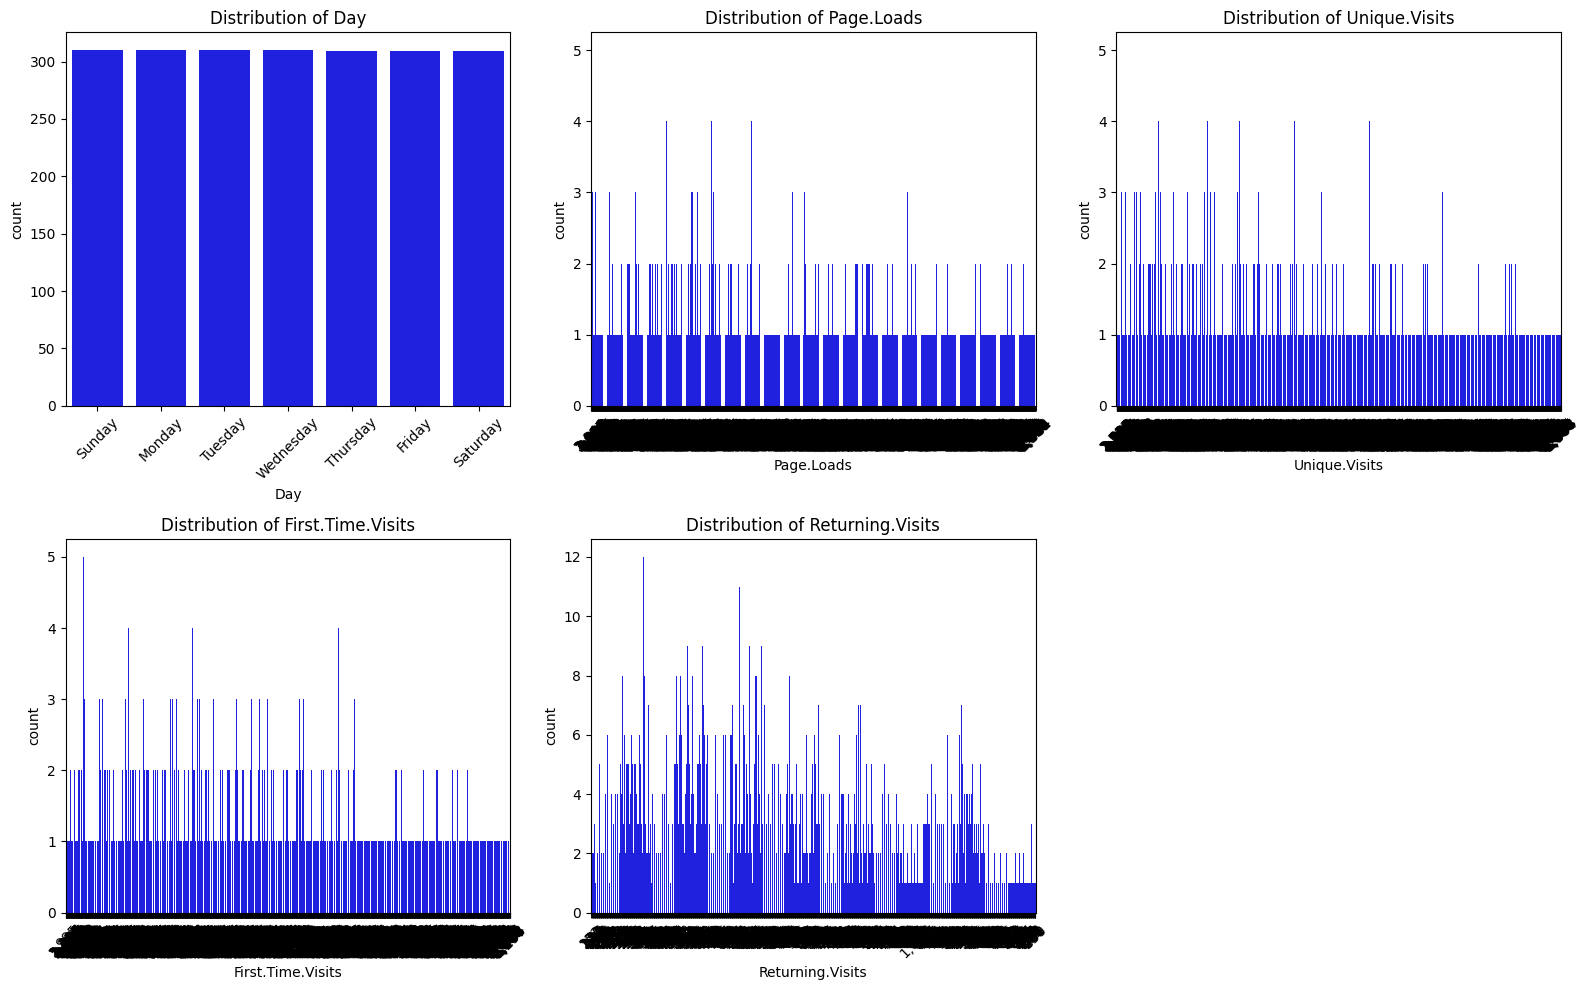

In [18]:
   # List of categorical columns
categorical_columns = ['Day', 'Page.Loads', 'Unique.Visits', 'First.Time.Visits', 
                       'Returning.Visits']

# Number of columns for subplots
num_columns = len(categorical_columns)

# Determine layout for subplots
cols = 3  # Number of columns in the plot grid
rows = (num_columns // cols) + (num_columns % cols > 0)  # Calculate number of rows

# Set up the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Create count plots for each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(data=website_visitors_pred,color='b', x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


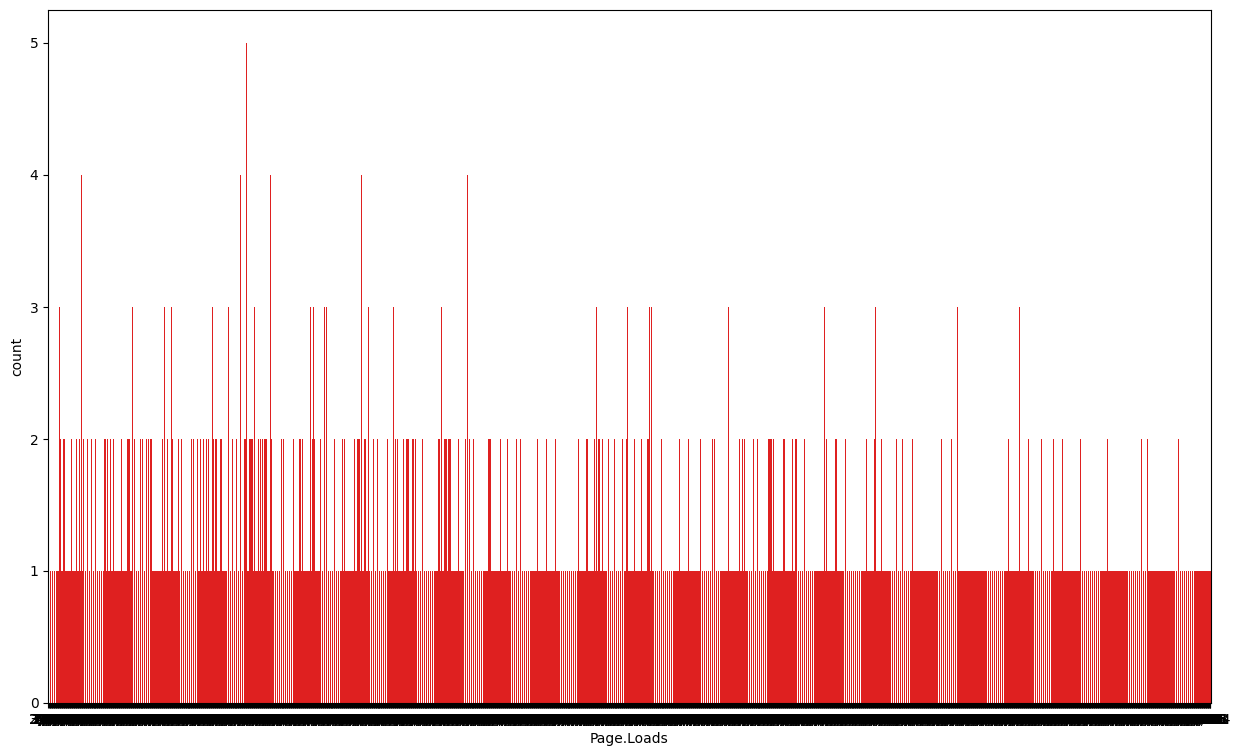

In [19]:

plt.figure(figsize=(15,9))
# Create a count plot
sns.countplot(data= website_visitors_pred,x = 'Page.Loads',color = 'r',orient='v')  # Replace 'class' with your categorical column

# Show the plot
plt.show()


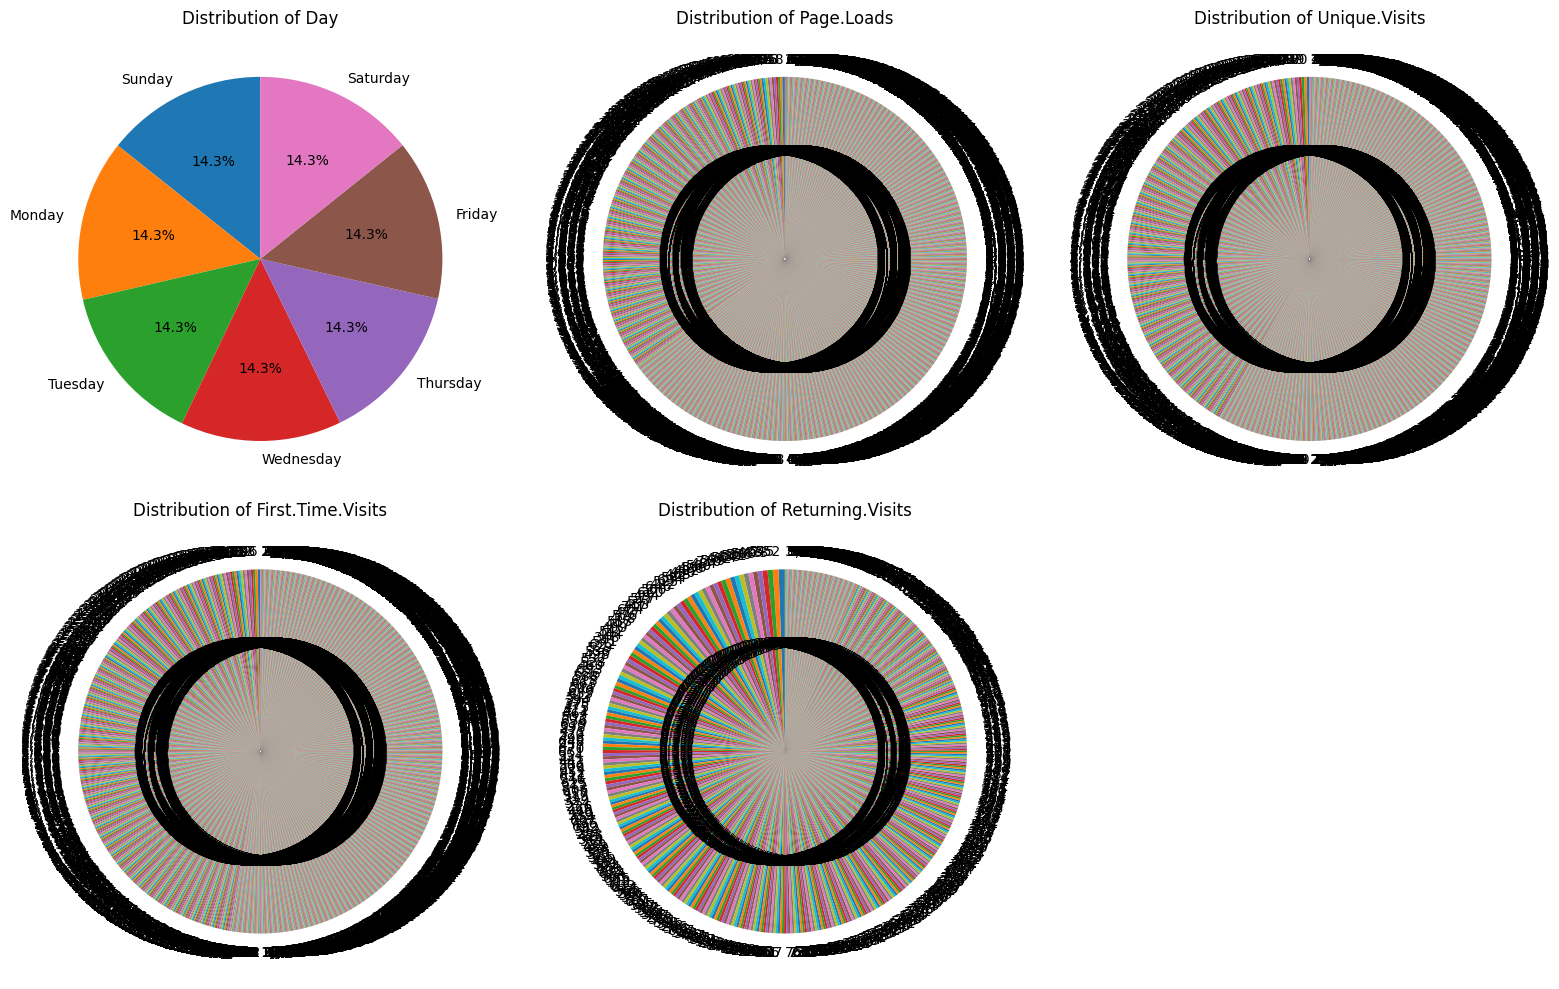

In [20]:
# List of categorical columns
categorical_columns = ['Day', 'Page.Loads', 'Unique.Visits', 'First.Time.Visits', 
                       'Returning.Visits']

# Number of columns for subplots
num_columns = len(categorical_columns)

# Determine layout for subplots
cols = 3  # Number of columns in the plot grid
rows = (num_columns // cols) + (num_columns % cols > 0)  # Calculate number of rows

# Set up the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Create pie plots for each categorical column
for i, column in enumerate(categorical_columns):
    # Get value counts for the column
    counts = website_visitors_pred[column].value_counts()
    
    # Create a pie plot
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Distribution of {column}')
    
# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [21]:
# Assuming 'data' is your DataFrame
numerical_columns = website_visitors_pred.select_dtypes(include=['int64', 'float64','int32']).columns.tolist()

print("Numerical Columns:", numerical_columns)

Numerical Columns: ['Day.Of.Week', 'year', 'month', 'day', 'quarter', 'day_of_year']


In [22]:
# Assuming df is your DataFrame
website_visitors_pred['is_month_start'] = website_visitors_pred['is_month_start'].astype(int)
website_visitors_pred['is_month_end'] = website_visitors_pred['is_month_end'].astype(int)
website_visitors_pred['is_leap_year'] = website_visitors_pred['is_leap_year'].astype(int)


In [23]:
import pandas as pd

# Remove commas from the relevant columns and convert them to numeric
website_visitors_pred['Page.Loads'] = pd.to_numeric(website_visitors_pred['Page.Loads'].str.replace(',', ''), errors='coerce')
website_visitors_pred['Unique.Visits'] = pd.to_numeric(website_visitors_pred['Unique.Visits'].str.replace(',', ''), errors='coerce')
website_visitors_pred['First.Time.Visits'] = pd.to_numeric(website_visitors_pred['First.Time.Visits'].str.replace(',', ''), errors='coerce')
website_visitors_pred['Returning.Visits'] = pd.to_numeric(website_visitors_pred['Returning.Visits'].str.replace(',', ''), errors='coerce')

# Check for any NaN values after conversion
print(website_visitors_pred[['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']].isna().sum())


Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64


In [24]:
website_visitors_pred.head()

Day  Day.Of.Week  Page.Loads  Unique.Visits  First.Time.Visits  \
0     Sunday            1        2146           1582               1430   
1     Monday            2        3621           2528               2297   
2    Tuesday            3        3698           2630               2352   
3  Wednesday            4        3667           2614               2327   
4   Thursday            5        3316           2366               2130   

   Returning.Visits  year  month  day  week  quarter  day_of_year  \
0               152  2014      9   14    37        3          257   
1               231  2014      9   15    38        3          258   
2               278  2014      9   16    38        3          259   
3               287  2014      9   17    38        3          260   
4               236  2014      9   18    38        3          261   

   is_month_start  is_month_end  is_leap_year  
0               0             0             0  
1               0             0             0  
2               0             0             0  
3               0             0             0  
4               0             0             0

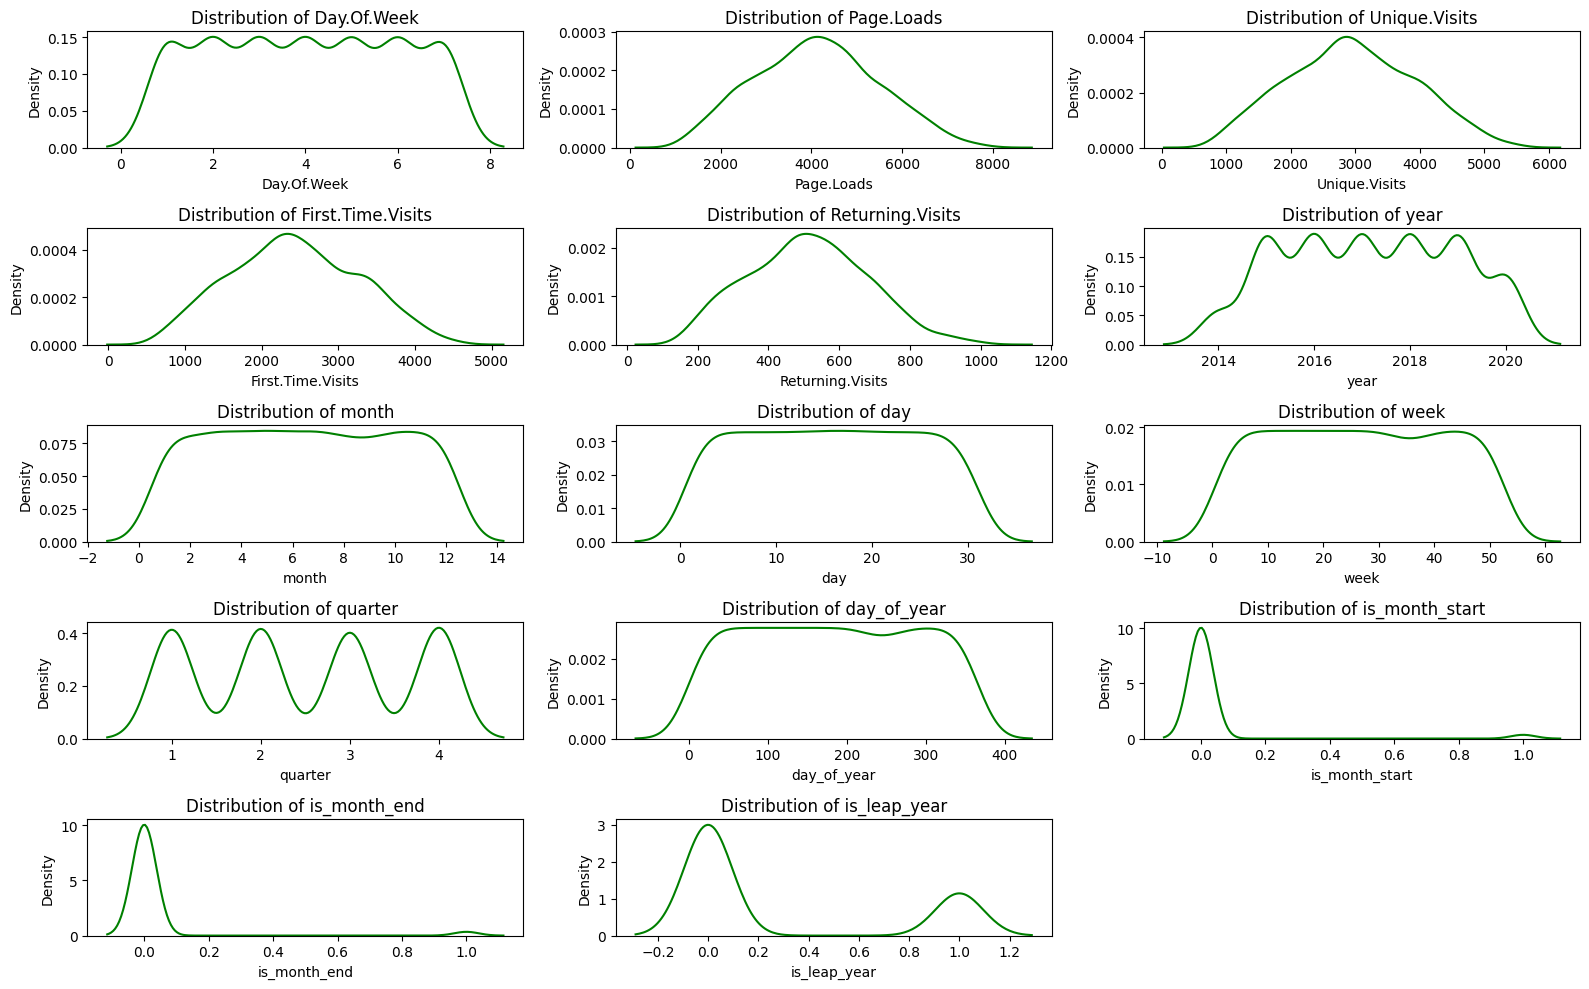

In [25]:
# List of numerical columns for KDE plots
numerical_columns = ['Day.Of.Week','Page.Loads', 'Unique.Visits', 'First.Time.Visits', 
                     'Returning.Visits','year','month','day','week','quarter','day_of_year','is_month_start','is_month_end','is_leap_year']  # Replace these with actual continuous columns if needed

# Number of columns for subplots
num_columns = len(numerical_columns)

# Determine layout for subplots
cols = 3  # Number of columns in the plot grid
rows = (num_columns // cols) + (num_columns % cols > 0)  # Calculate number of rows

# Set up the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Create KDE plots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.kdeplot(website_visitors_pred[column],color='g', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    
# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


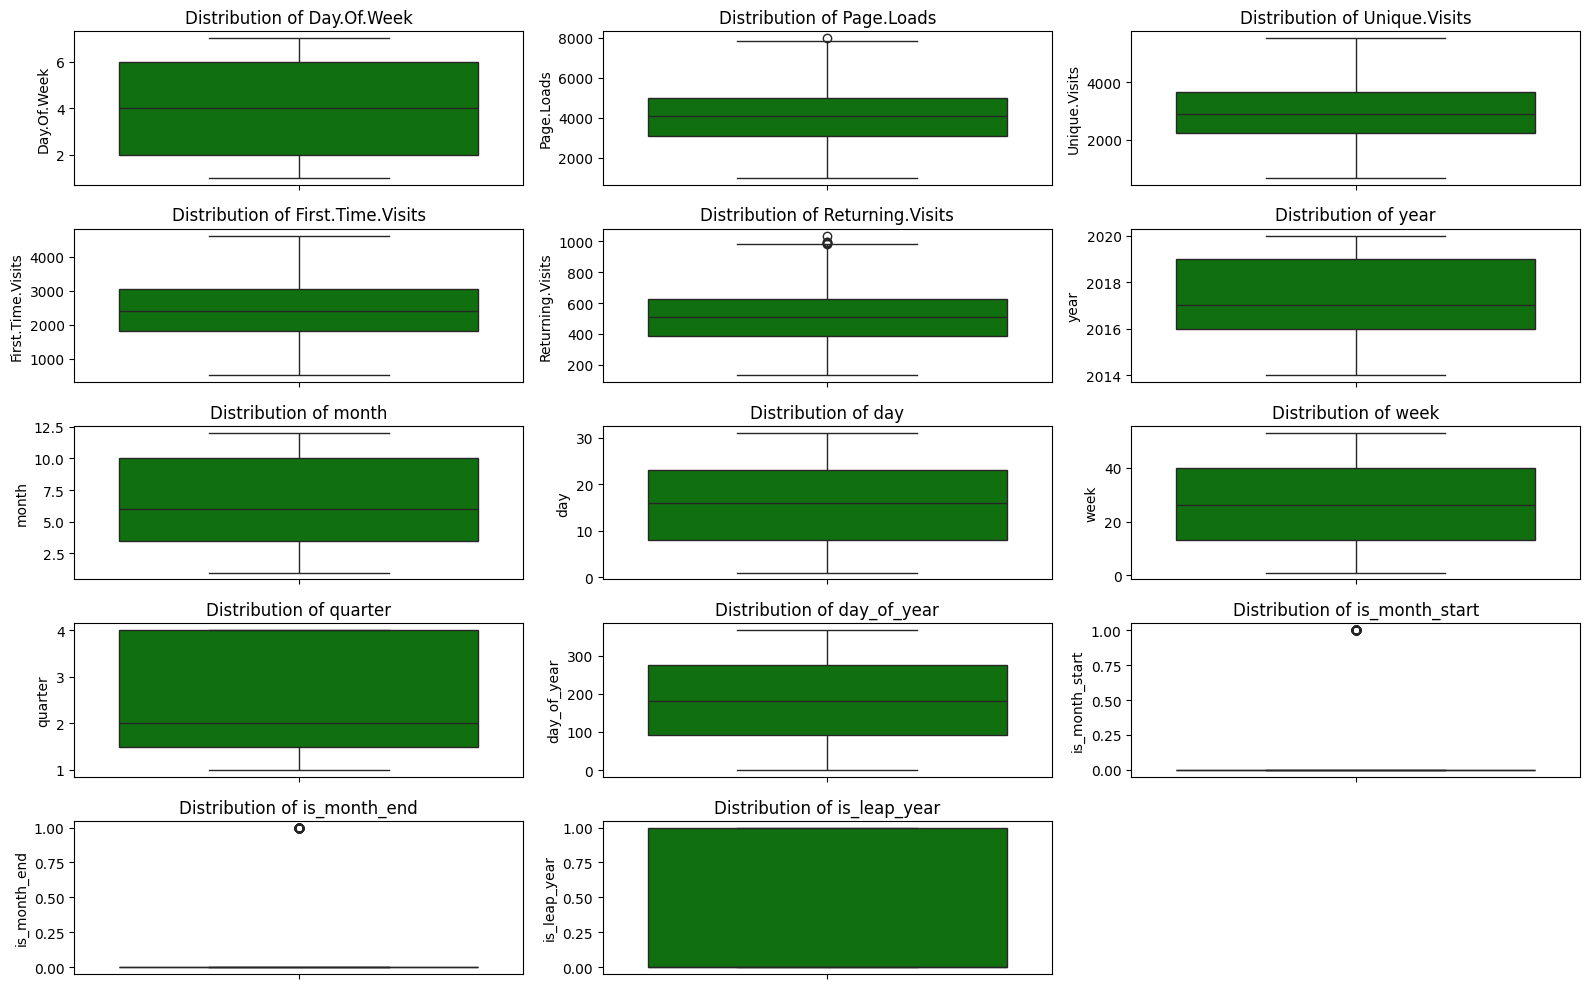

In [26]:

# List of numerical columns for box plots
numerical_columns = ['Day.Of.Week','Page.Loads', 'Unique.Visits', 'First.Time.Visits', 
                     'Returning.Visits', 'year', 'month', 'day', 'week', 'quarter', 
                     'day_of_year', 'is_month_start', 'is_month_end', 'is_leap_year'] 

# Number of columns for subplots
num_columns = len(numerical_columns)

# Determine layout for subplots
cols = 3  # Number of columns in the plot grid
rows = (num_columns // cols) + (num_columns % cols > 0)  # Calculate number of rows

# Set up the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Create box plots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=website_visitors_pred, y=column, ax=axes[i], color='g')  # Box plot instead of KDE
    axes[i].set_title(f'Distribution of {column}')
    
# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


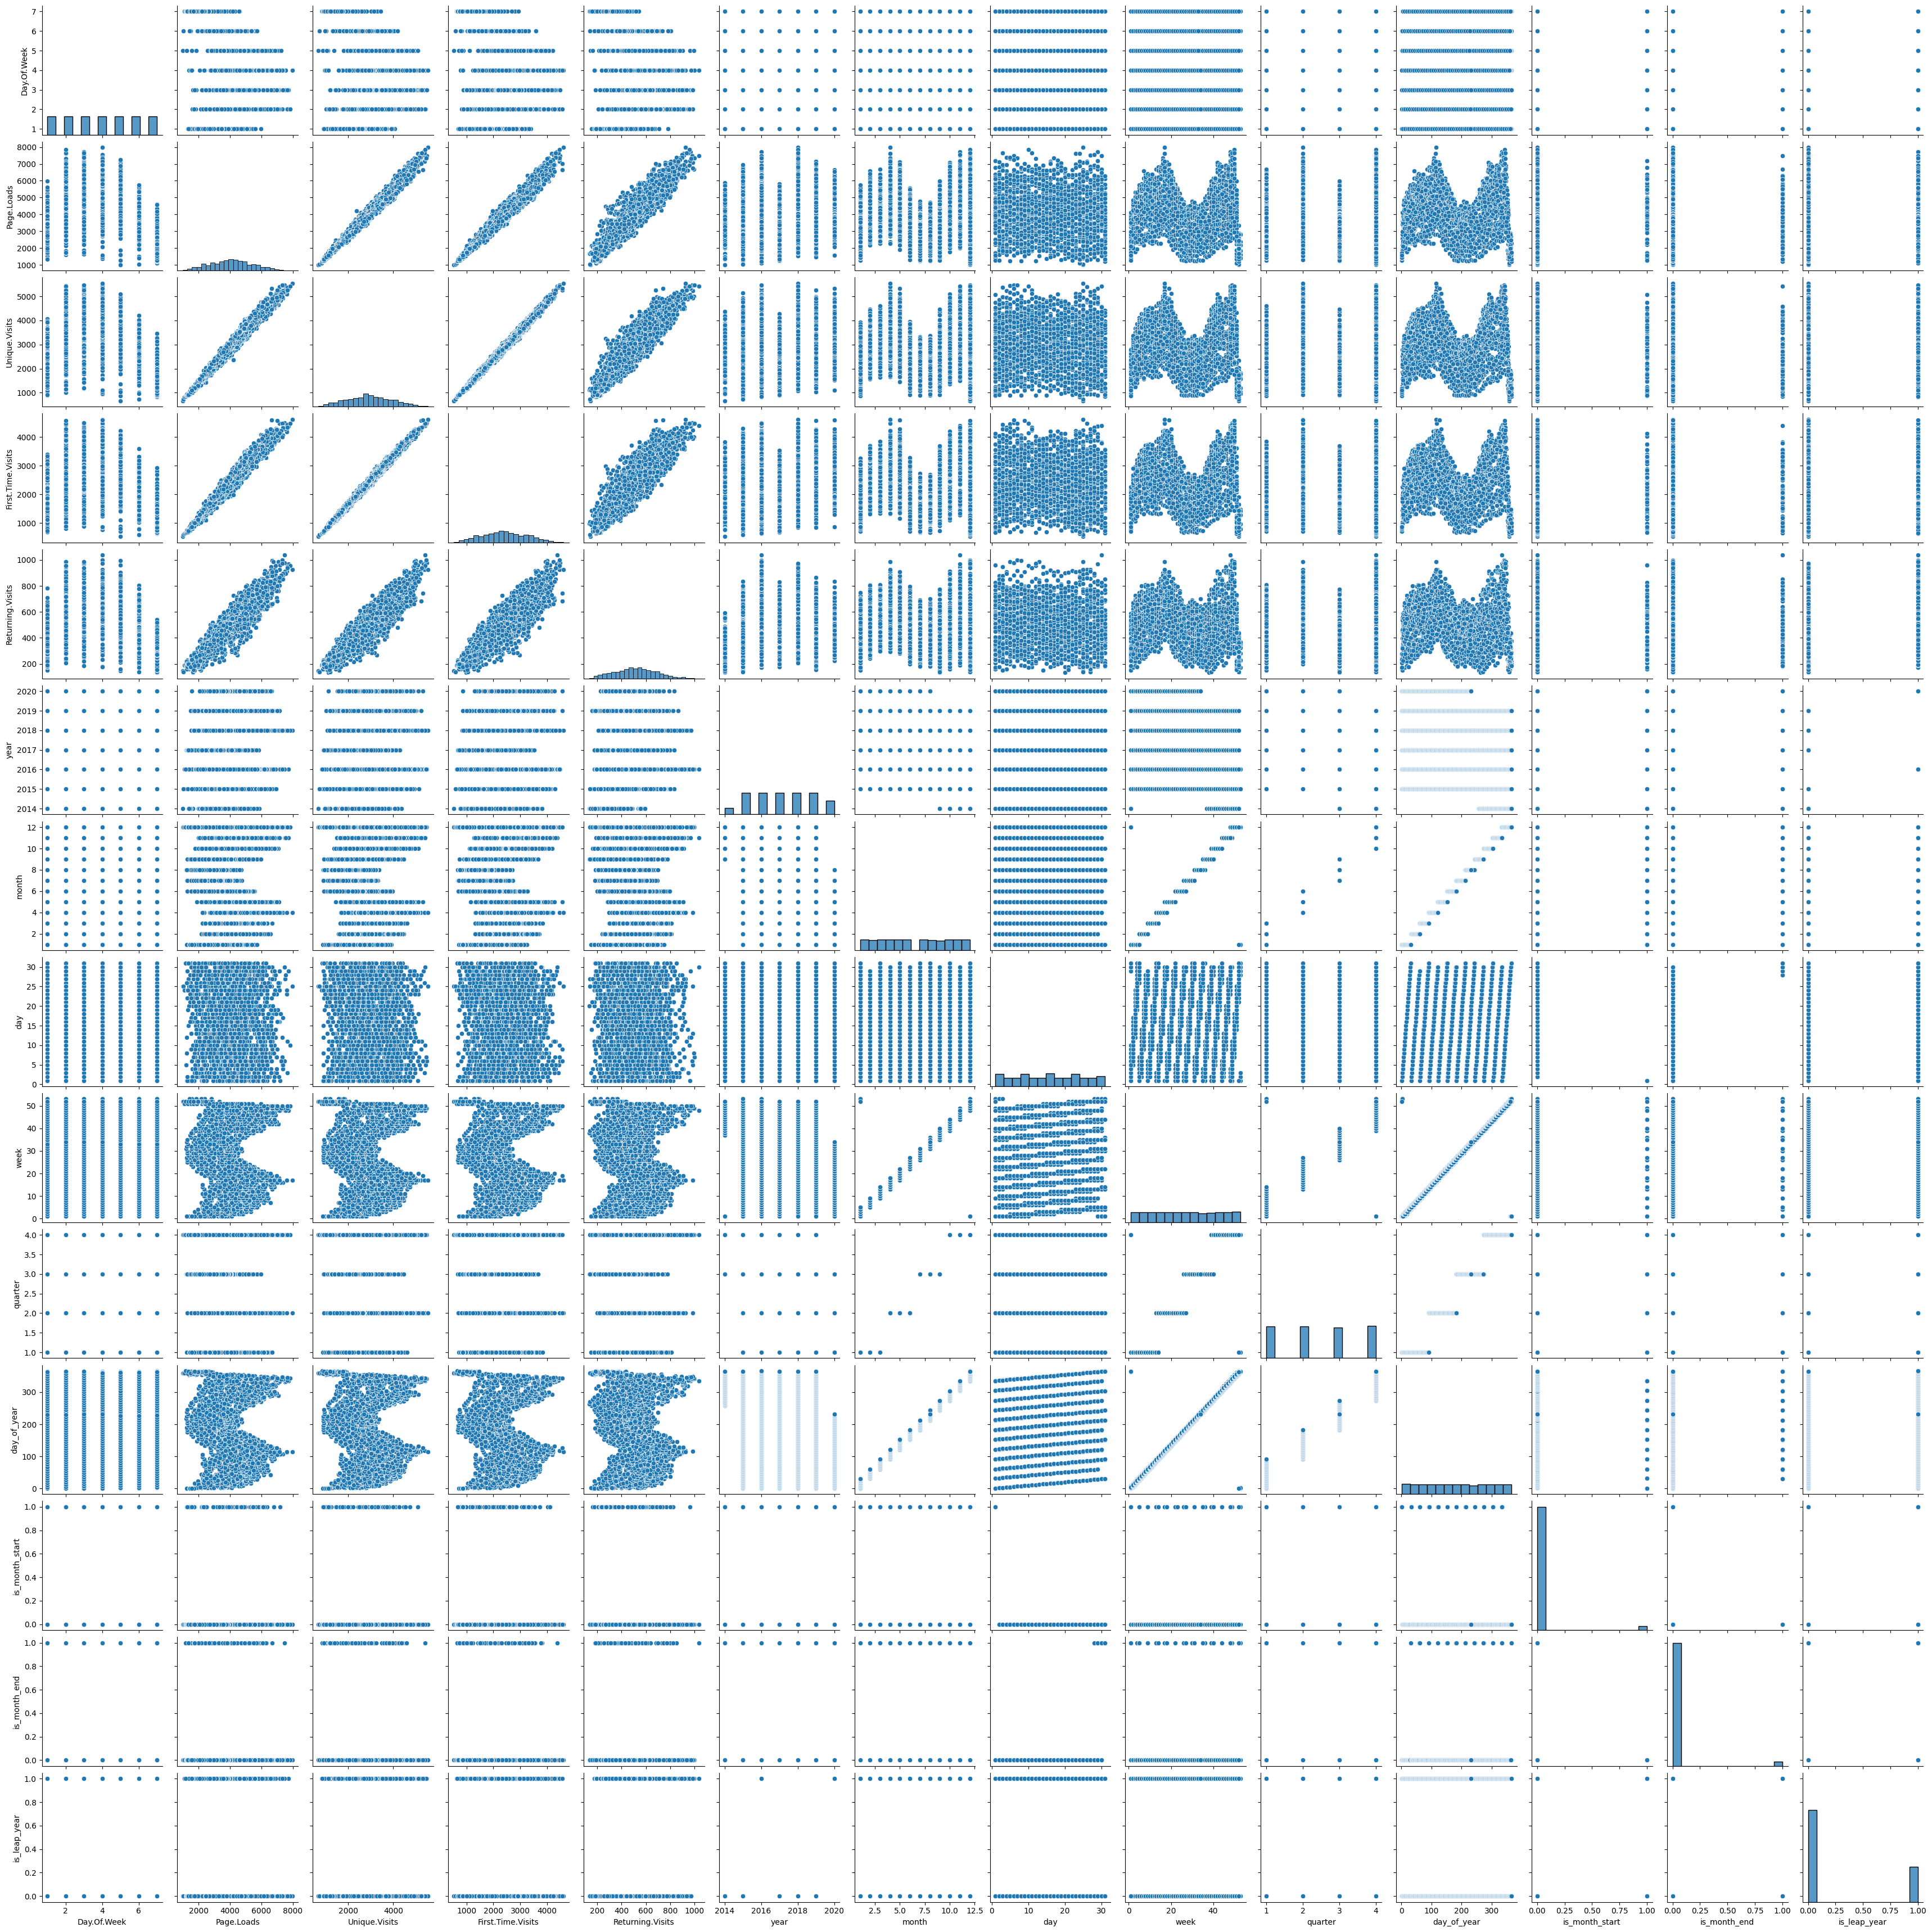

In [27]:
# Plot the pair plot
sns.pairplot(website_visitors_pred)
plt.show()

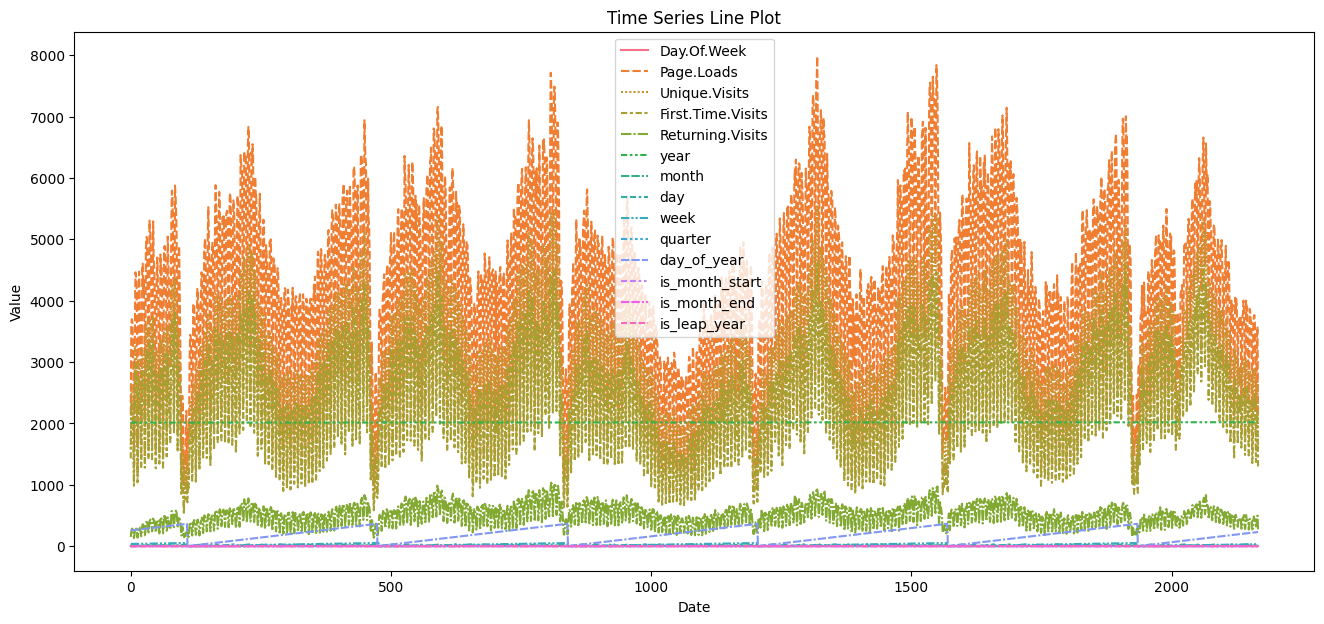

In [28]:
plt.figure(figsize=(16,7))
sns.lineplot(data =website_visitors_pred)

plt.title('Time Series Line Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


In [29]:
website_visitors_pred.head(4)

Day  Day.Of.Week  Page.Loads  Unique.Visits  First.Time.Visits  \
0     Sunday            1        2146           1582               1430   
1     Monday            2        3621           2528               2297   
2    Tuesday            3        3698           2630               2352   
3  Wednesday            4        3667           2614               2327   

   Returning.Visits  year  month  day  week  quarter  day_of_year  \
0               152  2014      9   14    37        3          257   
1               231  2014      9   15    38        3          258   
2               278  2014      9   16    38        3          259   
3               287  2014      9   17    38        3          260   

   is_month_start  is_month_end  is_leap_year  
0               0             0             0  
1               0             0             0  
2               0             0             0  
3               0             0             0

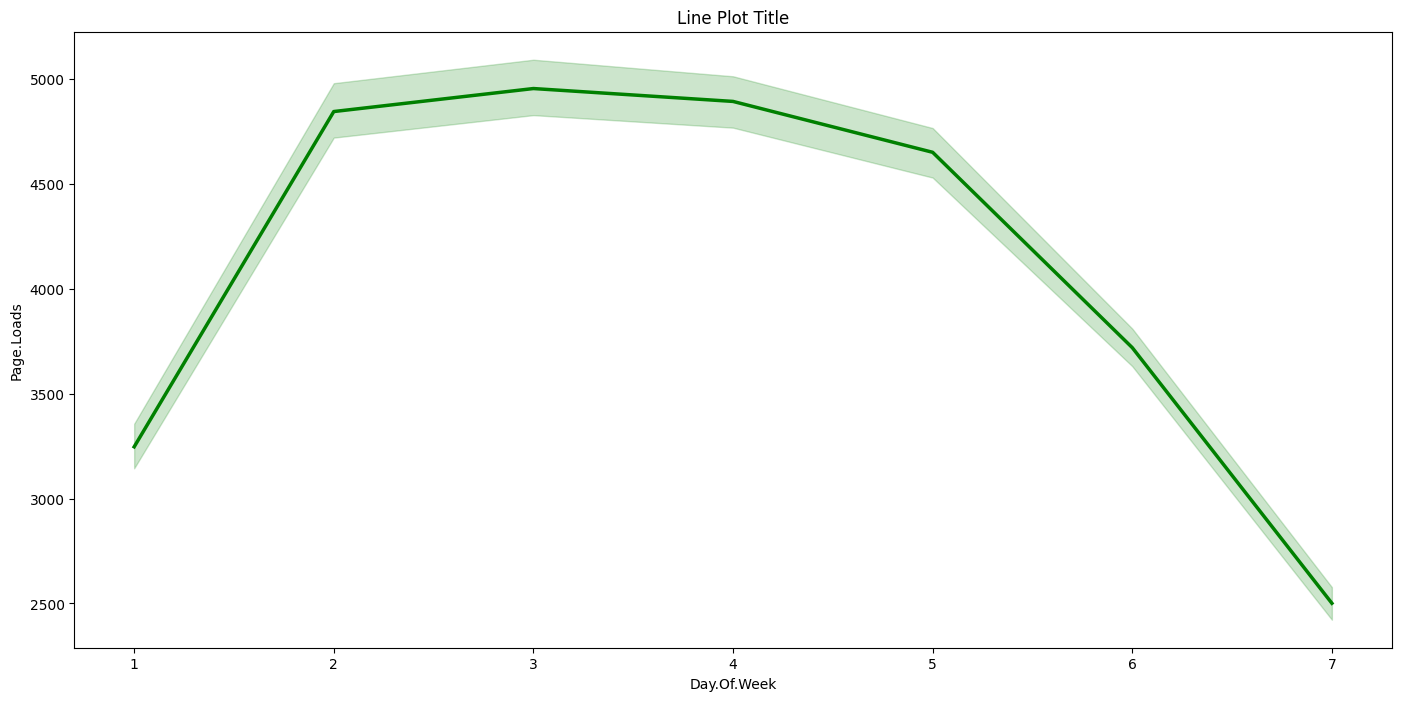

In [30]:
plt.figure(figsize=(17,8))
sns.lineplot(data=website_visitors_pred,
             x='Day.Of.Week',              # Column for x-axis
             y='Page.Loads',
            
             color = 'g',    # Column for y-axis,
             markers=True,
             linewidth=2.5,
             estimator='mean'
              # Set line styles, False for solid lines
        # Width of the lines
) 
plt.title('Line Plot Title')  # Title of the plot
# plt.xlabel('X-axis Label')     # Label for the x-axis
# plt.ylabel('Y-axis Label')     # Label for the y-axis
plt.show()


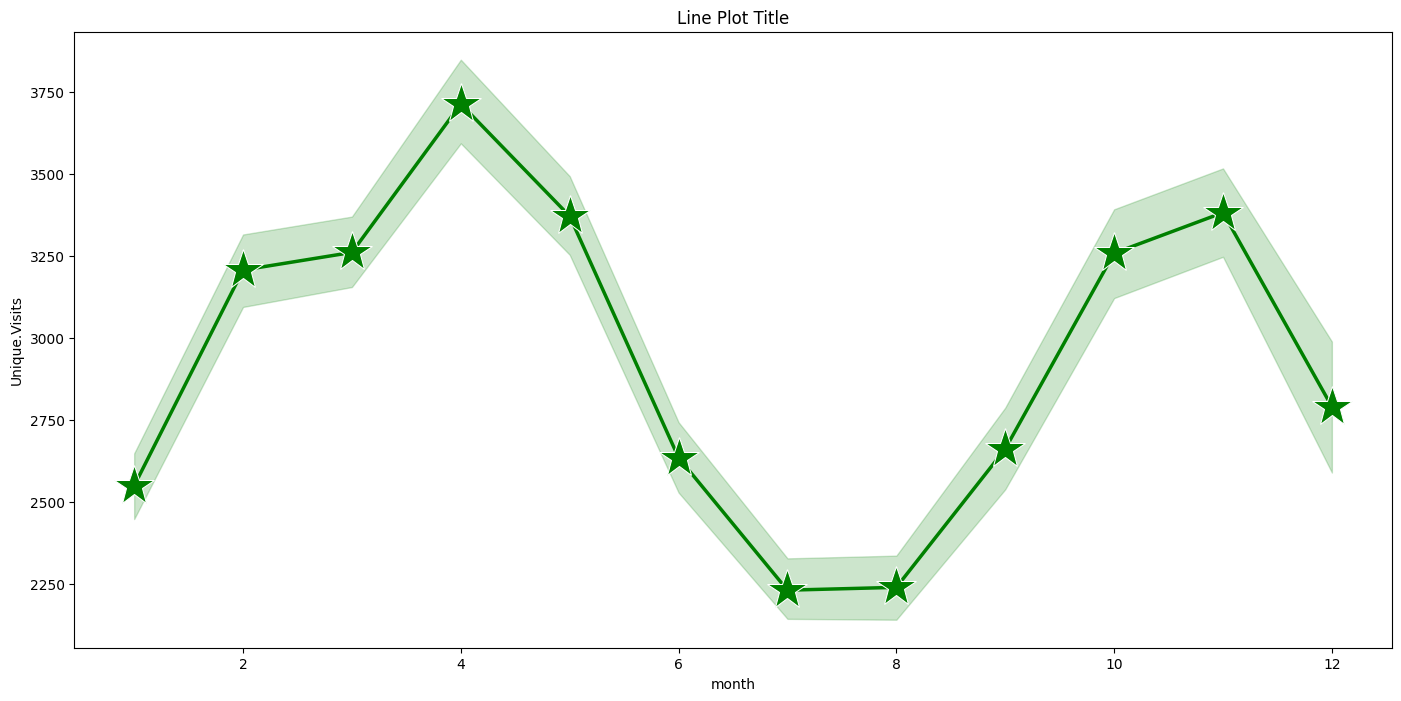

In [31]:
plt.figure(figsize=(17,8))
sns.lineplot(data=website_visitors_pred,
             x='month',              # Column for x-axis
             y='Unique.Visits',
            
             color = 'g',    # Column for y-axis,
             markers=True,
             marker="*",
             markersize=30,
             linewidth=2.5,
             estimator='mean'
              # Set line styles, False for solid lines
        # Width of the lines
) 
plt.title('Line Plot Title')  # Title of the plot
# plt.xlabel('X-axis Label')     # Label for the x-axis
# plt.ylabel('Y-axis Label')     # Label for the y-axis
plt.show()


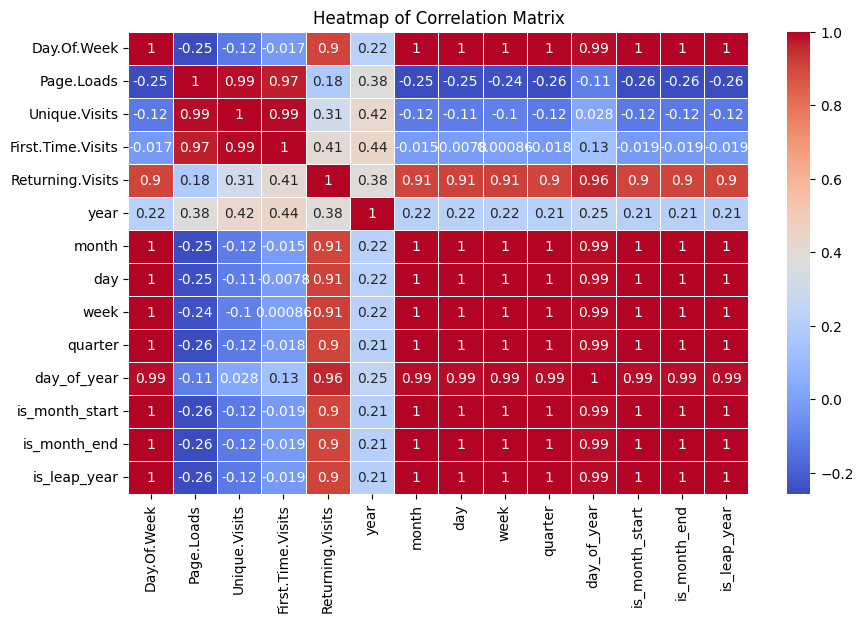

In [32]:
corr = website_visitors_pred.describe().corr()


# Calculate the correlation matrix

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

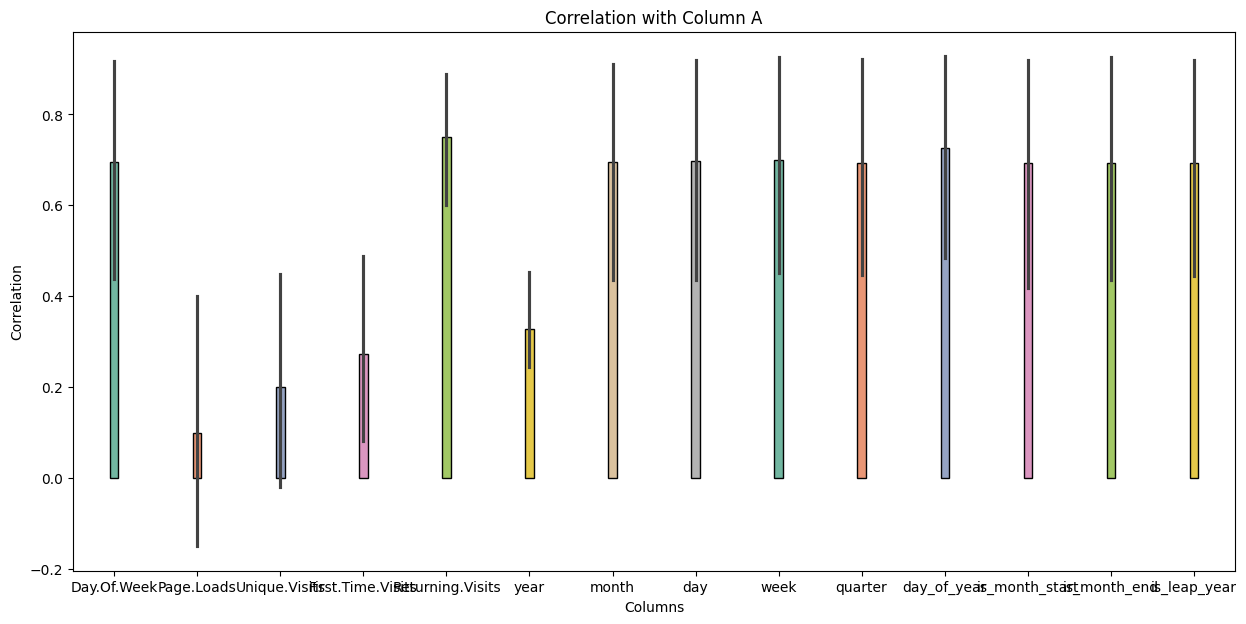

In [33]:
plt.figure(figsize=(15, 7))
# sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')
sns.barplot(corr,palette='Set2',edgecolor='black', linewidth=1,width=0.1,orient='v')
plt.title('Correlation with Column A')
plt.xlabel('Columns')
plt.ylabel('Correlation')    
plt.show()

In [34]:
website_visitors_pred.head()

Day  Day.Of.Week  Page.Loads  Unique.Visits  First.Time.Visits  \
0     Sunday            1        2146           1582               1430   
1     Monday            2        3621           2528               2297   
2    Tuesday            3        3698           2630               2352   
3  Wednesday            4        3667           2614               2327   
4   Thursday            5        3316           2366               2130   

   Returning.Visits  year  month  day  week  quarter  day_of_year  \
0               152  2014      9   14    37        3          257   
1               231  2014      9   15    38        3          258   
2               278  2014      9   16    38        3          259   
3               287  2014      9   17    38        3          260   
4               236  2014      9   18    38        3          261   

   is_month_start  is_month_end  is_leap_year  
0               0             0             0  
1               0             0             0  
2               0             0             0  
3               0             0             0  
4               0             0             0

In [35]:
# Assuming you have features and target variables defined as X and y
x = website_visitors_pred.drop('Unique.Visits', axis=1)  # Features (excluding the target column)
y = website_visitors_pred['Unique.Visits']  # Target column (e.g., 'visitors')

In [36]:
x.sample(2)

Day  Day.Of.Week  Page.Loads  First.Time.Visits  Returning.Visits  \
1173  Thursday            5        4477               2530               604   
1271  Thursday            5        5375               3044               660   

      year  month  day  week  quarter  day_of_year  is_month_start  \
1173  2017     11   30    48        4          334               0   
1271  2018      3    8    10        1           67               0   

      is_month_end  is_leap_year  
1173             1             0  
1271             0             0

In [37]:
y.sample(3)

1235    3249
24      3014
1482    3120
Name: Unique.Visits, dtype: int64

In [38]:
x.shape 

(2167, 14)

In [39]:
y.shape 

(2167,)

In [40]:
# Separate numerical and categorical columns
numerical_features = x.select_dtypes(include=['int64', 'float64','int32','UInt32']).columns
categorical_features = x.select_dtypes(include=['object']).columns


In [41]:
print(numerical_features)
print()
print(categorical_features)

Index(['Day.Of.Week', 'Page.Loads', 'First.Time.Visits', 'Returning.Visits',
       'year', 'month', 'day', 'week', 'quarter', 'day_of_year',
       'is_month_start', 'is_month_end', 'is_leap_year'],
      dtype='object')

Index(['Day'], dtype='object')


In [42]:
# Preprocessing for numerical data (Standard scaling) and categorical data (One-Hot Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output = False,drop='first',handle_unknown = 'ignore'),categorical_features)
    ])

In [43]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['Day.Of.Week', 'Page.Loads', 'First.Time.Visits', 'Returning.Visits',
       'year', 'month', 'day', 'week', 'quarter', 'day_of_year',
       'is_month_start', 'is_month_end', 'is_leap_year'],
      dtype='object')),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Day'], dtype='object'))])

In [44]:
# List of regression algorithms
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'SGD Regressor': SGDRegressor(),
    'Huber Regressor': HuberRegressor()
}

In [45]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [46]:
x_train.shape

(1733, 14)

In [47]:
x_test.shape

(434, 14)

In [48]:
y_test.shape 

(434,)

In [49]:
y_train.shape 

(1733,)

In [50]:
from sklearn.pipeline import Pipeline  # Move import to the top
from sklearn.metrics import mean_squared_error, r2_score  # For evaluation metrics

def evaluate_models(regressors, preprocessor, x_train, x_test, y_train, y_test):
    for name, model in regressors.items():
        # Create a pipeline with preprocessing and the regressor
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        
        # Train the model
        pipeline.fit(x_train, y_train)
        
        # Make predictions
        y_pred = pipeline.predict(x_test)
        
        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Print the results
        print(f'{name}:')
        print(f'  Mean Squared Error: {mse:.4f}')
        print(f'  R² Score: {r2:.4f}')
        print('-' * 40)

# Example usage:
# regressors = {'Linear Regression': LinearRegression(), 'Random Forest': RandomForestRegressor()}
# evaluate_models(regressors, preprocessor, x_train, x_test, y_train, y_test)


In [51]:
# Evaluate all regression models
evaluate_models(regressors, preprocessor, x_train, x_test, y_train, y_test)

Linear Regression:
  Mean Squared Error: 0.0000
  R² Score: 1.0000
----------------------------------------
Ridge Regression:
  Mean Squared Error: 11.5409
  R² Score: 1.0000
----------------------------------------
Lasso Regression:
  Mean Squared Error: 1.4732
  R² Score: 1.0000
----------------------------------------
ElasticNet:
  Mean Squared Error: 32985.5222
  R² Score: 0.9663
----------------------------------------
SGD Regressor:
  Mean Squared Error: 0.7617
  R² Score: 1.0000
----------------------------------------
Huber Regressor:
  Mean Squared Error: 0.0003
  R² Score: 1.0000
----------------------------------------


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20128\3275629903.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mse_scores, palette='Blues_d')


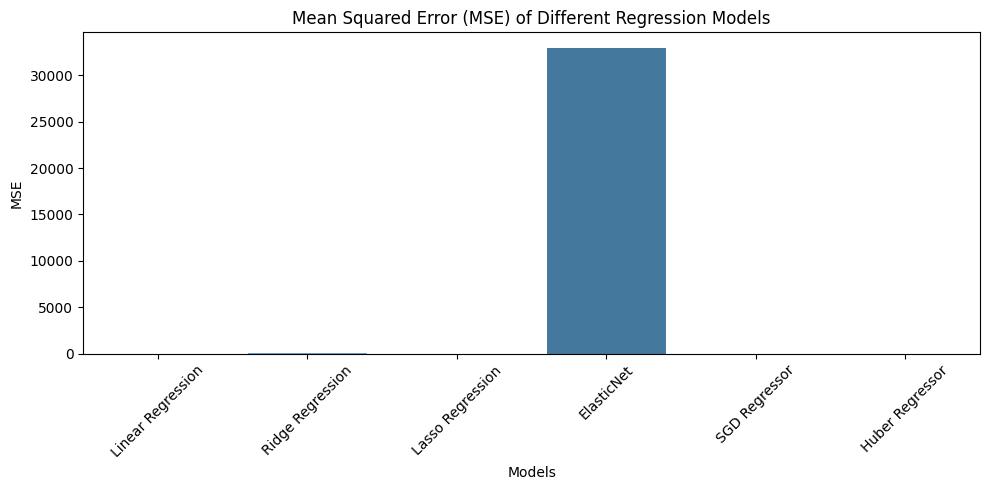

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20128\3275629903.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_scores, palette='Greens_d')


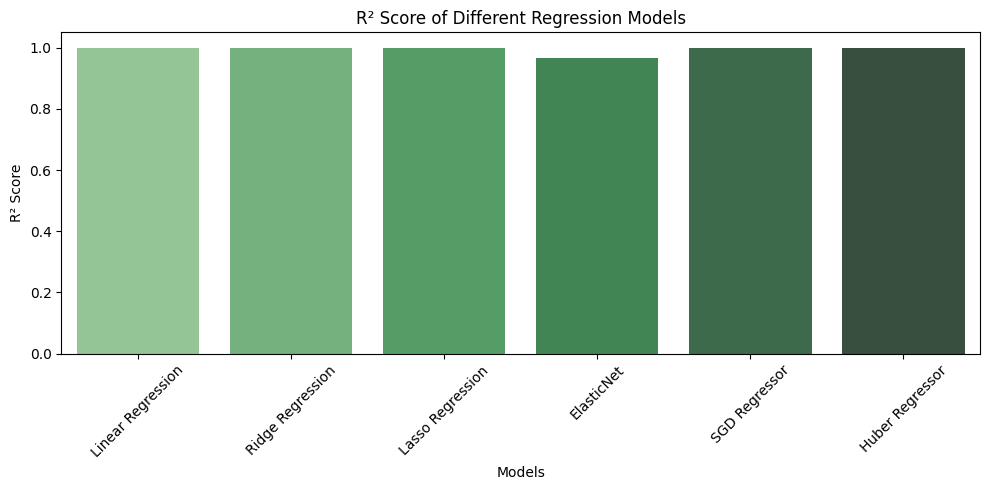

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to store results
model_names = []
mse_scores = []
r2_scores = []

# Function to evaluate multiple models and store results for plotting
def evaluate_models_and_plot(regressors, preprocessor, x_train, x_test, y_train, y_test):
    for name, model in regressors.items():
        # Create a pipeline with preprocessing and the regressor
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        
        # Train the model
        pipeline.fit(x_train, y_train)
        
        # Make predictions
        y_pred = pipeline.predict(x_test)
        
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store the results for plotting
        model_names.append(name)
        mse_scores.append(mse)
        r2_scores.append(r2)
        
# Call the function to evaluate the models and store the results
evaluate_models_and_plot(regressors, preprocessor, x_train, x_test, y_train, y_test)

# Plotting Mean Squared Error (MSE)
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=mse_scores, palette='Blues_d')
plt.title('Mean Squared Error (MSE) of Different Regression Models')
plt.ylabel('MSE')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting R² Scores
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=r2_scores, palette='Greens_d')
plt.title('R² Score of Different Regression Models')
plt.ylabel('R² Score')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
